<a href="https://colab.research.google.com/github/TruCoder25/DeepLearning/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN** ***Practical***

In [5]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [6]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## Divide features to depenedent and independent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [9]:
### Feature Engineering
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)
geo = geo.astype(int)
gender = gender.astype(int)


In [10]:
# concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis = 1)

In [11]:
X = pd.concat([X,geo,gender],axis=1)

In [12]:
## split to train test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
X_train.shape


(8000, 11)

In [15]:
## Part 2 lets create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [16]:
 ## lets initialize the ANN
classifier = Sequential()

In [17]:
classifier.add(Dense(units=11,activation='relu'))


In [18]:
# first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [19]:
# first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [20]:
# first output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [22]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [25]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7851 - loss: 0.4628 - val_accuracy: 0.8357 - val_loss: 0.3993
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8448 - loss: 0.3702 - val_accuracy: 0.8319 - val_loss: 0.3870
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3513 - val_accuracy: 0.8489 - val_loss: 0.3786
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.3531 - val_accuracy: 0.8429 - val_loss: 0.3757
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8545 - loss: 0.3448 - val_accuracy: 0.8413 - val_loss: 0.3899
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8590 - loss: 0.3433 - val_accuracy: 0.8542 - val_loss: 0.3586
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8568 - loss: 0.3464 - val_accuracy: 0.8546 - val_loss: 0.3607
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8619 - loss: 0.3424 - 

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

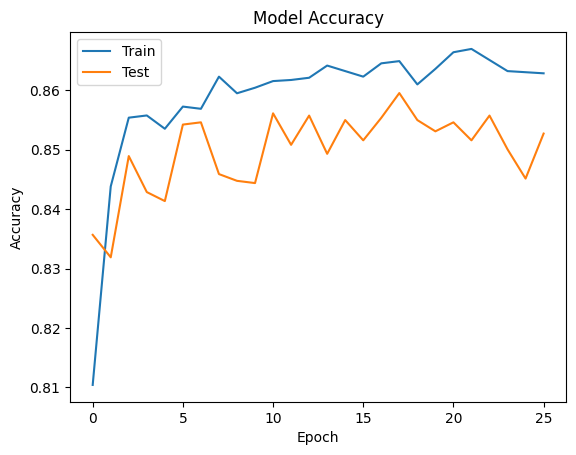

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')

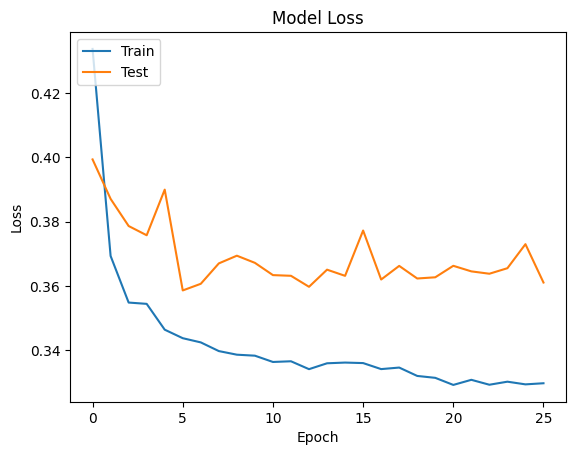

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')

In [29]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [30]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1501,   94],
       [ 186,  219]])

In [31]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.86

In [33]:
## get the weights
classifier.get_weights()

[array([[-0.14367718, -0.8228903 , -0.2953261 , -0.5011377 , -0.5192644 ,
          0.27755532, -1.4527105 ,  1.4390665 , -0.38326958, -0.71502334,
          1.1655905 ],
        [ 1.0014392 , -1.4754342 ,  1.1464096 , -0.5749752 ,  2.6699803 ,
          2.4409242 , -0.02847495, -1.260308  , -2.0945108 , -0.706676  ,
         -1.5755742 ],
        [ 0.01826987,  0.02017719, -0.23980302,  1.0514354 , -0.6963948 ,
          0.19124174, -0.10239943, -0.6142388 , -1.1014266 ,  0.4611381 ,
         -0.26377106],
        [ 1.3226558 ,  0.1924104 , -0.82359296, -1.7695968 ,  0.40504804,
         -0.15223031, -1.2405273 , -0.48843473,  0.43828884,  0.1609509 ,
          0.59876674],
        [ 2.9597566 , -0.9124575 , -3.0380032 ,  0.29940137, -0.9051894 ,
          1.0912762 ,  0.7079032 ,  0.7623677 , -0.64049965,  0.30217317,
         -0.01067515],
        [-0.27027002, -0.39690837, -0.2450995 , -0.75202876, -0.04767276,
         -0.33381033,  0.11378968, -0.6815741 , -0.54634976,  0.3141184